<a href="https://colab.research.google.com/github/Bagyalakshmi1429/machine_learning/blob/main/MLLABTEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


DATA LOADING AND INSPECTION

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2015.csv')

In [ ]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df.shape

(158, 12)

MISSING VALUES

In [ ]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
df.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

BINNING

In [ ]:

bin_edges = [0, 4.9, 6.5, 10]
bin_labels = ['Low Happiness', 'Medium Happiness', 'High Happiness']
df['Happiness Group'] = pd.cut(df['Happiness Score'], bins=bin_edges, labels=bin_labels)
print(df.head())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

ONE-HOT ENCODING

In [ ]:

df_encoded = pd.get_dummies(df, columns=['Region'])
print(df_encoded)


         Country  Happiness Rank  Happiness Score  Standard Error  \
0    Switzerland               1            7.587         0.03411   
1        Iceland               2            7.561         0.04884   
2        Denmark               3            7.527         0.03328   
3         Norway               4            7.522         0.03880   
4         Canada               5            7.427         0.03553   
..           ...             ...              ...             ...   
153       Rwanda             154            3.465         0.03464   
154        Benin             155            3.340         0.03656   
155        Syria             156            3.006         0.05015   
156      Burundi             157            2.905         0.08658   
157         Togo             158            2.839         0.06727   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                

NORMALIZATION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Economy (GDP per Capita)'] = scaler.fit_transform(df[['Economy (GDP per Capita)']])


CHI2 TEST

In [ ]:

import scipy.stats as stats
contingency_table = pd.crosstab(df['Region'], df['Happiness Rank'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
alpha = 0.05
if p <= alpha:
    print("There is a significant association between Region and Happiness Rank.")
else:
    print("There is no significant association between Region and Happiness Rank.")


There is no significant association between Region and Happiness Rank.


COVARIANCE MATRIX

                          Economy (GDP per Capita)    Family  \
Economy (GDP per Capita)                  1.006369  0.176318   
Family                                    0.176318  0.074185   
Health (Life Expectancy)                  0.202375  0.035741   

                          Health (Life Expectancy)  
Economy (GDP per Capita)                  0.202375  
Family                                    0.035741  
Health (Life Expectancy)                  0.061047  


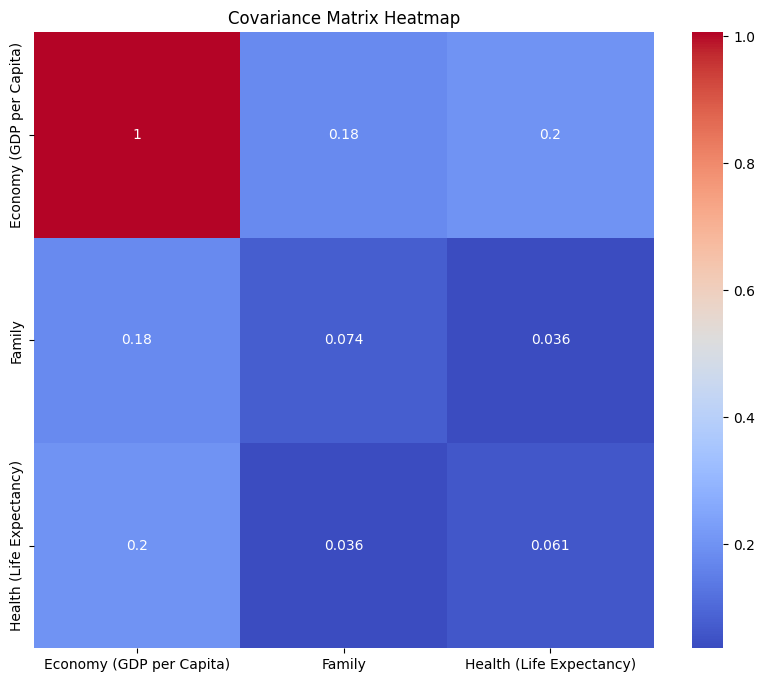

In [ ]:

subset_columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']
cov_matrix = df[subset_columns].cov()
print(cov_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix Heatmap')
plt.show()


VISUALIZATION

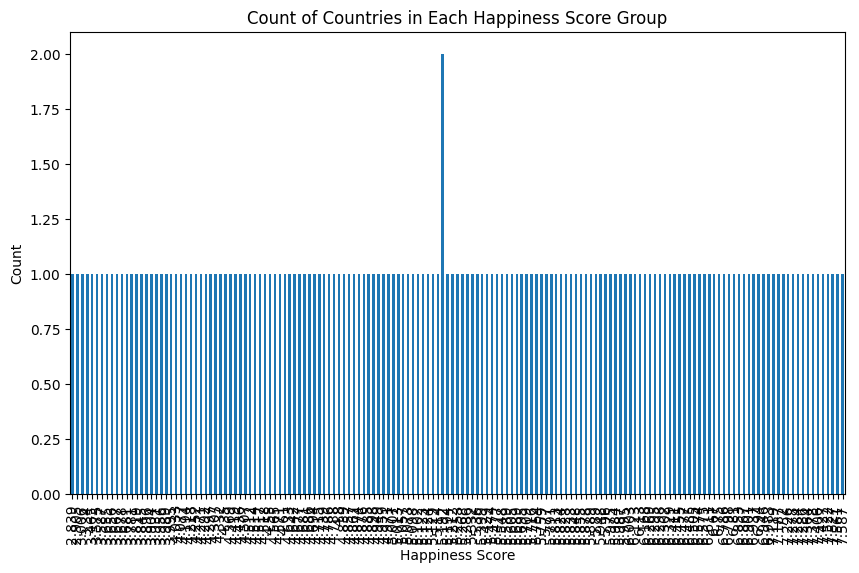

In [ ]:

plt.figure(figsize=(10, 6))
df['Happiness Score'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Countries in Each Happiness Score Group')
plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.show()


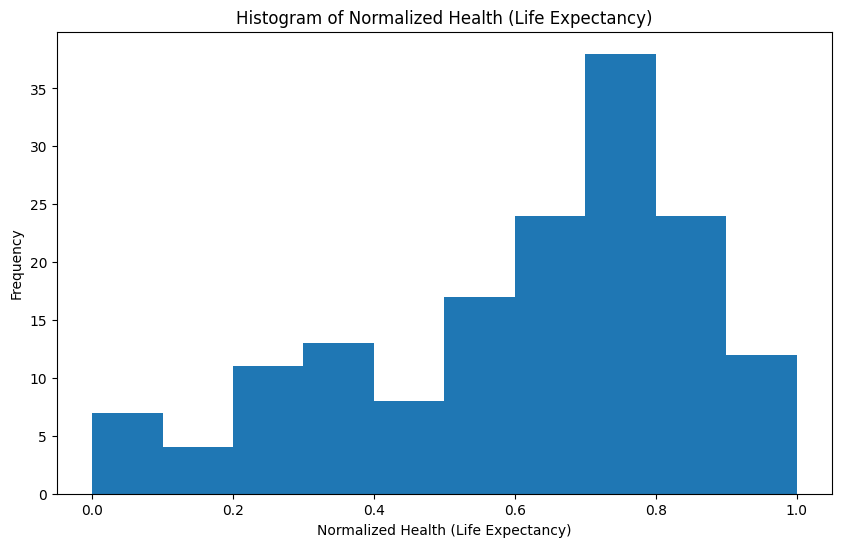

In [ ]:


normalized_health = (df['Health (Life Expectancy)'] - df['Health (Life Expectancy)'].min()) / (df['Health (Life Expectancy)'].max() - df['Health (Life Expectancy)'].min())

plt.figure(figsize=(10, 6))
plt.hist(normalized_health, bins=10)
plt.title('Histogram of Normalized Health (Life Expectancy)')
plt.xlabel('Normalized Health (Life Expectancy)')
plt.ylabel('Frequency')


plt.show()


<Figure size 1200x800 with 0 Axes>

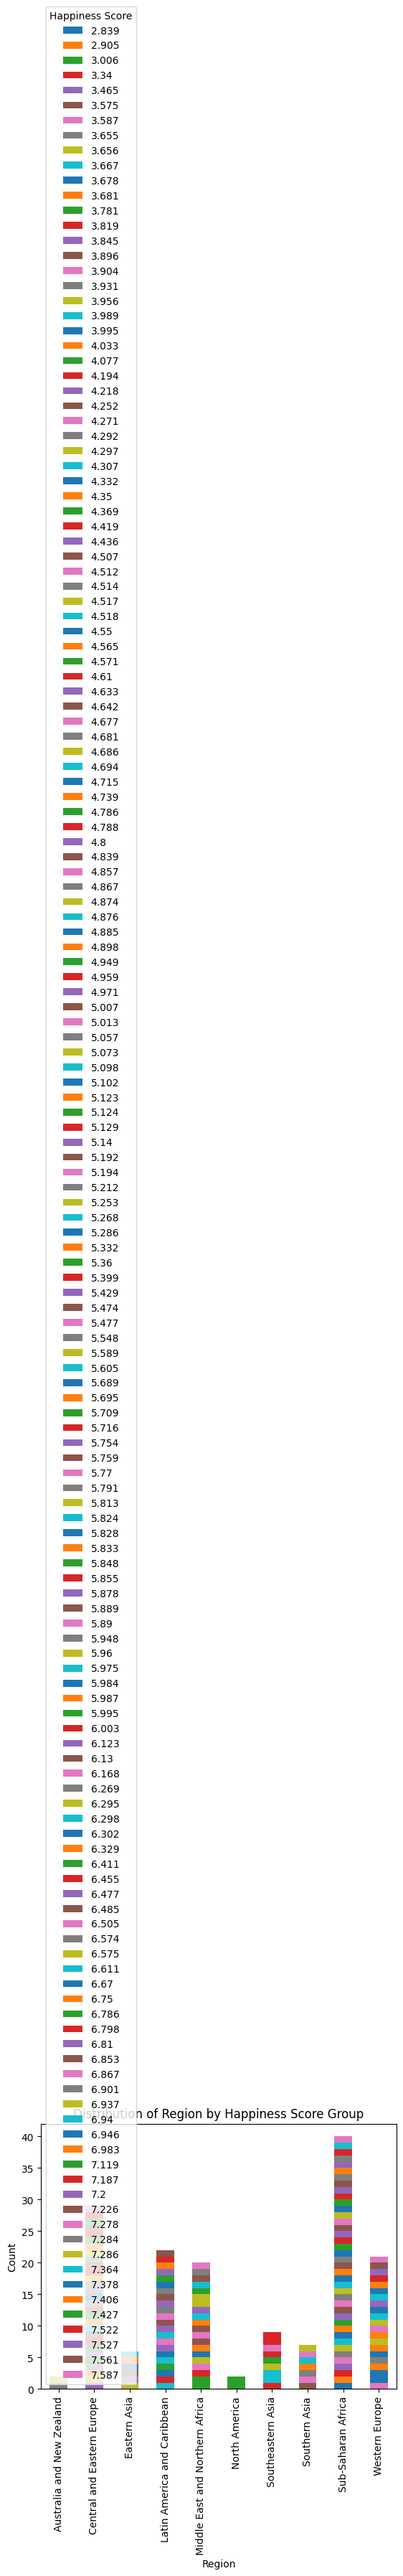

In [ ]:


pivot_table = df.pivot_table(index='Region', columns='Happiness Score', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Distribution of Region by Happiness Score Group')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()
